### **Gaussian Mixture Models (GMMs)**

#### Probabilistic Clustering and Soft Assignments
Most clustering algorithms, like k-means, assign data points to the closest cluster in terms of distance, resulting in a hard assignment. Each data point belongs entirely to one cluster. However, in many real-world scenarios, the boundaries between clusters aren't always clear-cut. This is where probabilistic clustering comes in.

Gaussian Mixture Models (GMMs) provide a probabilistic approach to clustering. Instead of assigning each data point to a single cluster, GMMs give probabilities that a given data point belongs to each cluster. This method results in "soft assignments," where a data point can belong to multiple clusters but with different degrees of membership.

#### Expectation-Maximization (EM) in the Context of GMM
GMMs are based on the assumption that the data is generated from a mixture of several Gaussian distributions. The goal is to identify these underlying Gaussians and their parameters.

However, a direct estimation of parameters is challenging because we don't know which data point belongs to which Gaussian. Here's where the Expectation-Maximization (EM) algorithm comes in. EM is an iterative method that consists of two main steps:

1. **Expectation (E-step)**: Given the current estimates of the Gaussian parameters, assign each data point to the Gaussians probabilistically (calculate the "responsibilities").
  
2. **Maximization (M-step)**: Given the current assignments (or responsibilities), update the parameters of the Gaussians to best fit the data.

These steps are repeated until convergence, resulting in optimized parameters for the Gaussian distributions.

#### Ability to Identify Elliptical Clusters
While k-means tends to find spherical clusters due to its distance metric, GMMs can identify elliptical (or elongated) clusters. This capability comes from the fact that each cluster in GMM is modeled by a Gaussian distribution, which can take on elliptical shapes depending on its covariance matrix.

#### Key Parameters for GMM


1. **`n_components`**: 
    - **Description**: The number of mixture components (or Gaussian distributions) to be estimated.
    - **Default**: 1
    - **Typical Usage**: Choose based on the expected number of clusters in the data.

2. **`covariance_type`**:
    - **Description**: The type of covariance matrix for each component.
    - **Options**:
        - `'full'`: Each component has its own general covariance matrix.
        - `'tied'`: All components share the same general covariance matrix.
        - `'diag'`: Each component has its own diagonal covariance matrix.
        - `'spherical'`: Each component has its own single variance.
    - **Default**: `'full'`
    - **Typical Usage**: Choice depends on the underlying data distribution and prior knowledge.

3. **`tol`**:
    - **Description**: Convergence threshold. The EM iterations will stop when the lower bound average gain is below this threshold.
    - **Default**: 1e-3
    - **Typical Usage**: Adjust if the model has convergence issues.

4. **`reg_covar`**:
    - **Description**: Non-negative regularization added to the diagonal of the covariance matrix to ensure the matrix is positive definite.
    - **Default**: 1e-6
    - **Typical Usage**: Can be increased if there are numerical issues during fitting.

5. **`n_init`**:
    - **Description**: Number of times the algorithm will be run with different initializations. The final results will be the best output of `n_init` consecutive runs in terms of the lowest Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC).
    - **Default**: 1
    - **Typical Usage**: Can be increased to ensure a better result, especially if the initialization affects the outcome significantly.

6. **`init_params`**:
    - **Description**: Method used to initialize the weights, means, and covariances.
    - **Options**:
        - `'kmeans'`: Parameters are initialized using k-means.
        - `'random'`: Parameters are initialized randomly.
    - **Default**: `'kmeans'`
    - **Typical Usage**: Generally, the default k-means initialization works well, but for some datasets, a random initialization may be beneficial.


### Exercise

In the following, see if you can adjust the GMM parameters so that the fifth cluster appears.


/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


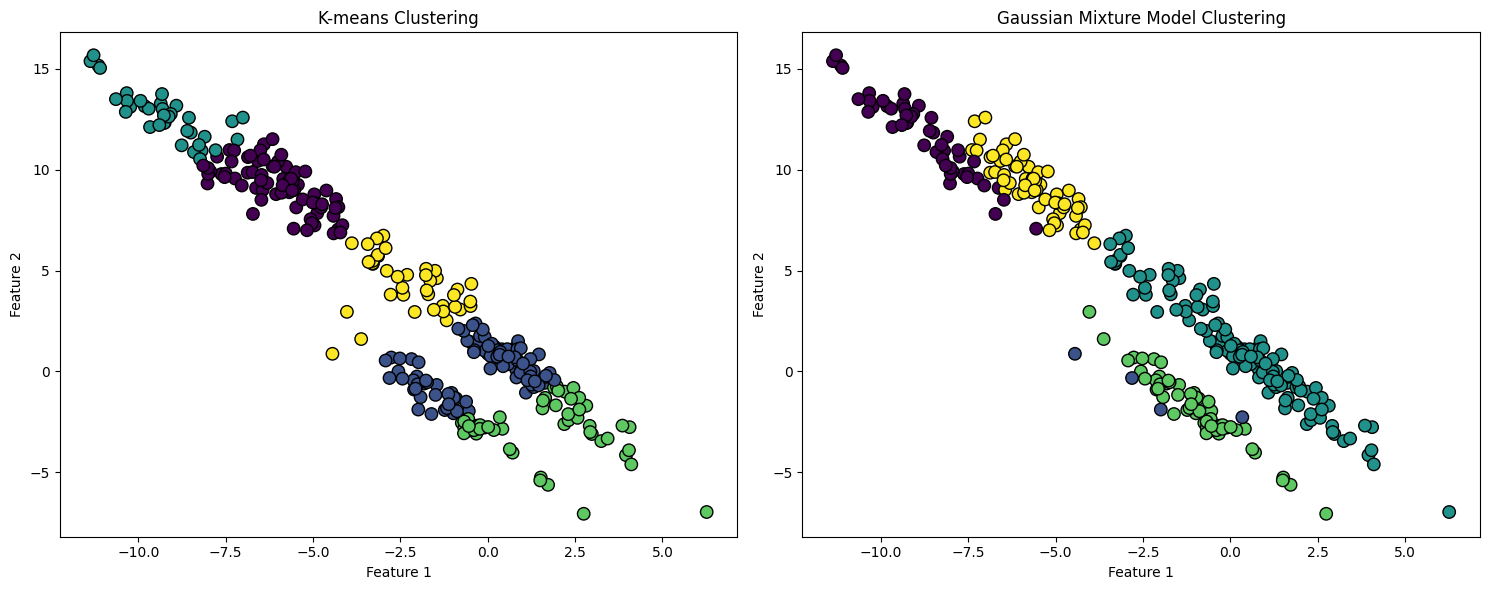

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data with spherical clusters
X, y = make_blobs(n_samples=300, centers=5, cluster_std=2.0,random_state=42)

# Stretch and rotate some of the blobs to create elliptical clusters
transformation_matrix = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation_matrix)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


Note that we can view the mixed membership of each datapoint in a GMM using sklearn's API as follows:

First 10 data points:
 [[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]]

Probabilities of belonging to each cluster for the first 10 data points:
 [[1.00000000e+00 5.79506157e-67 1.35999675e-60]
 [1.00000000e+00 1.36438005e-64 3.14154567e-60]
 [2.05865579e-51 1.00000000e+00 1.72369478e-15]
 [1.71564500e-45 8.23076192e-24 1.00000000e+00]
 [1.00000000e+00 1.20447754e-71 9.85406873e-70]
 [5.35909457e-46 7.86374676e-33 1.00000000e+00]
 [6.62024106e-62 1.00000000e+00 1.28187028e-22]
 [1.59110948e-42 4.03172216e-32 1.00000000e+00]
 [3.55372635e-57 1.00000000e+00 1.71082744e-22]
 [3.63941531e-62 1.00000000e+00 4.78982670e-27]]


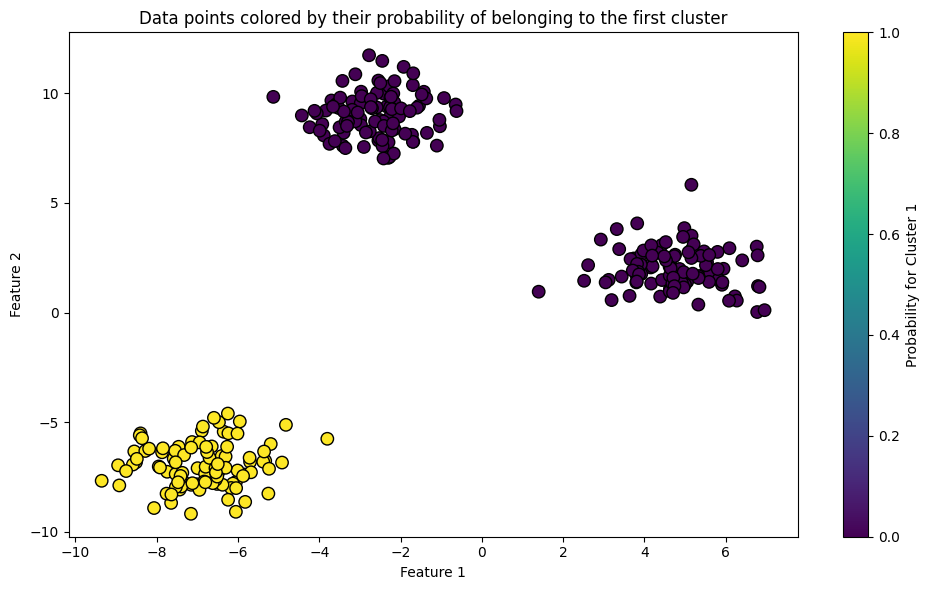

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Fit a GMM with 3 components
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Obtain mixed membership (soft assignments) for each data point
probs = gmm.predict_proba(X)

# Display the first 10 data points and their probabilities
print("First 10 data points:\n", X[:10])
print("\nProbabilities of belonging to each cluster for the first 10 data points:\n", probs[:10])

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=probs[:, 0], marker='o', edgecolors='k', s=80, cmap='viridis')
plt.title('Data points colored by their probability of belonging to the first cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Probability for Cluster 1')
plt.tight_layout()
plt.show()


Finally, observe that GMM's do not handle concentric clusters well.

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


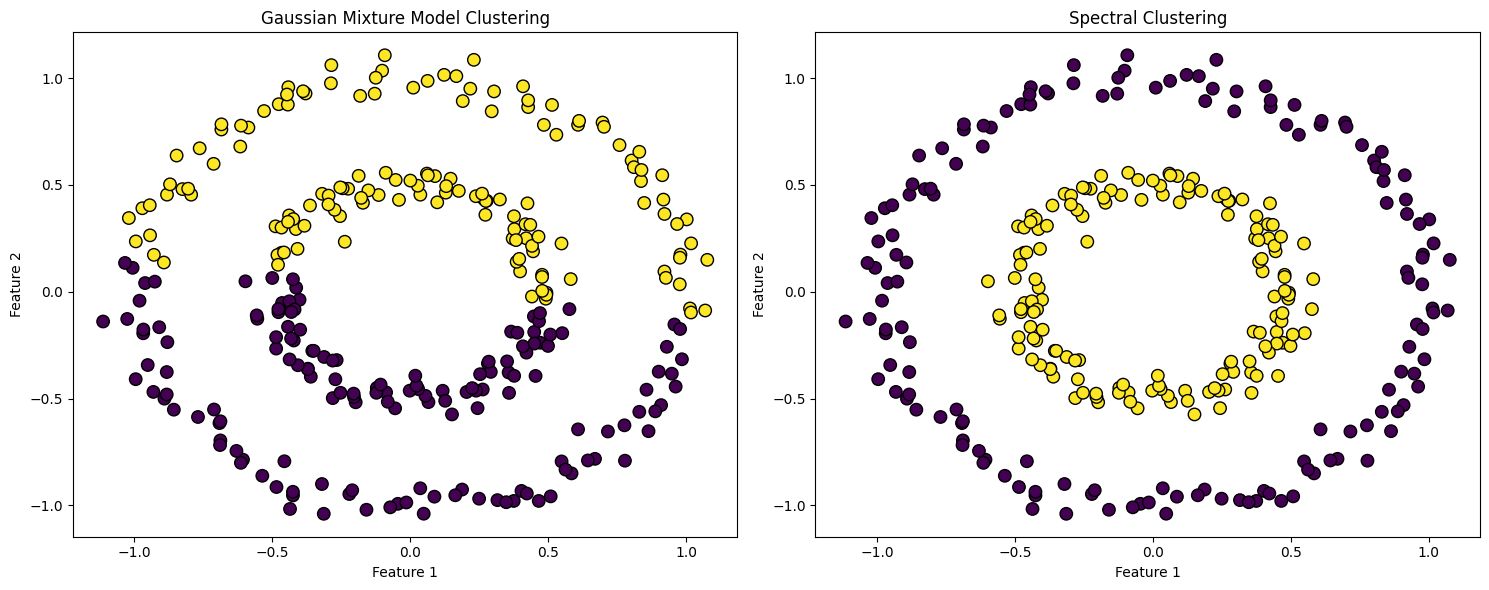

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

# Generate synthetic data with concentric circles
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply GMM
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10)
spectral_labels = spectral.fit_predict(X)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


### **Mean-Shift Clustering**

#### 1. Kernel Density Estimation (KDE):

Kernel Density Estimation (KDE) is a non-parametric technique used to estimate the probability density function (pdf) of a continuous random variable. Rather than counting occurrences in fixed intervals (like histograms), KDE smoothens the data points with a kernel, resulting in a continuous curve (density function).

#### 2. Mean-Shift Clustering:

Mean-shift clustering is a technique that identifies clusters in data based on the density of data points. The core idea is to identify the "modes" or peaks of the density, where the density is estimated using KDE.

#### Algorithm:
1. Choose a bandwidth parameter, which determines the size of the kernel and, consequently, the smoothness of the estimated density.
2. For each data point, place the kernel at that point and compute the mean (or "centroid") of the data within the kernel.
3. Shift the kernel to the location of the mean and repeat until convergence.
4. Once all points converge (or stop moving), those moving to the same mode or peak are considered part of the same cluster.

#### 3. Mean-Shift's Ability to Find Non-spherical Clusters:

Mean-Shift doesn't make assumptions about the shape of clusters, unlike methods like k-means. Instead, it uses the underlying density of data points to find and adapt to the shape of each cluster. As a result, mean-shift can detect clusters of any shape, including elongated or irregularly shaped clusters.

#### Key Parameters

1. **`bandwidth`**:
    - **Description**: The bandwidth of the kernel. If `None`, the bandwidth is estimated using a heuristic based on the median of pairwise distances among the data points.
    - **Typical Usage**: A smaller bandwidth will produce more clusters, while a larger bandwidth may merge distinct clusters. If unsure, using the `estimate_bandwidth` function from `sklearn` can provide a reasonable starting point.

2. **`seeds`**:
    - **Description**: Initial seeding points for the clustering. If `None`, the algorithm uses a flat kernel to initialize.
    - **Typical Usage**: Generally, this is left as `None` for the algorithm to automatically choose seed points. However, if you have prior knowledge about the data or potential cluster centers, you can provide them.

3. **`bin_seeding`**:
    - **Description**: If `True`, initial kernel locations are not locations of all data points, but rather the location of the discretized version of the data, where data points are binned onto a grid whose coarseness corresponds to the bandwidth.
    - **Default**: `False`
    - **Typical Usage**: Setting this to `True` can speed up the algorithm, especially when the number of data points is large. However, it might compromise the accuracy of cluster assignments.

4. **`min_bin_freq`**:
    - **Description**: To speed up the algorithm, accept only those bins with at least `min_bin_freq` points as seeds.
    - **Default**: 1
    - **Typical Usage**: Increase this if the dataset is large and you're using `bin_seeding=True`. It helps in ignoring bins with fewer points, potentially speeding up the process.

5. **`cluster_all`**:
    - **Description**: If `True`, all the data points that are not assigned to any cluster (outliers) are assigned to the closest cluster center. If `False`, outliers are given the label `-1`.
    - **Default**: `True`
    - **Typical Usage**: If you suspect the presence of outliers or want to explicitly handle data points that don't belong to any cluster, set this to `False`.


### Exercise

Adjust the preceding parameters to see if you can improve the clustering.

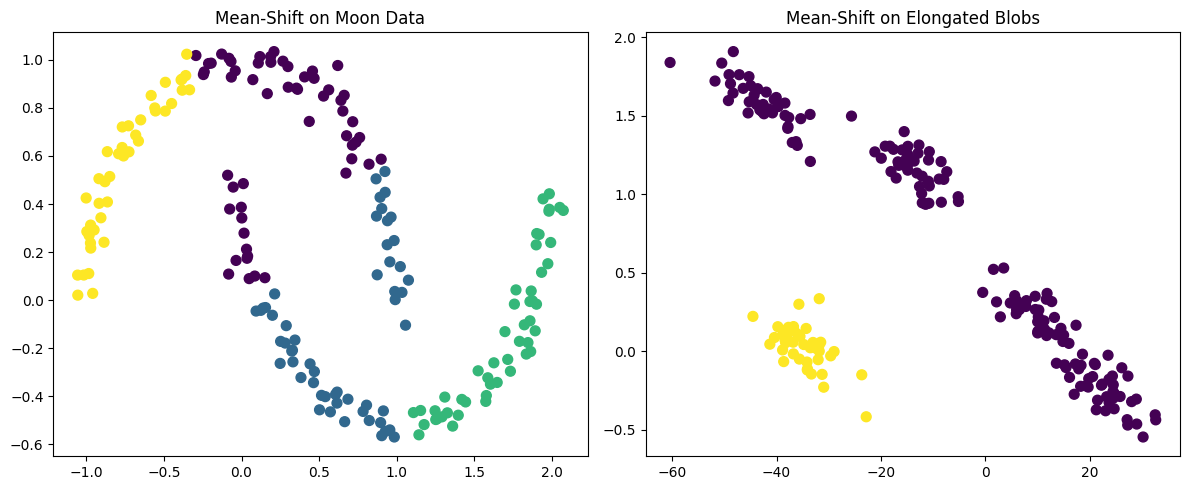

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

# Generate synthetic data: two moon shapes and elongated blobs
X_moons, _ = make_moons(n_samples=200, noise=0.05)
X_blobs, y = make_blobs(n_samples=200, centers=5, random_state=42)

# Create a transformation matrix to stretch the blob
transformation_matrix = np.array([[5, -.1], [0, 0.1]])

# Apply the transformation to the blobs
X_blobs_stretched = np.dot(X_blobs, transformation_matrix)


# Mean-Shift clustering
bandwidth_moons = estimate_bandwidth(X_moons, quantile=0.2)
ms_moons = MeanShift(bandwidth=bandwidth_moons).fit(X_moons)

bandwidth_blobs = estimate_bandwidth(X_blobs_stretched, quantile=0.2)
ms_blobs = MeanShift(bandwidth=bandwidth_blobs).fit(X_blobs)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=ms_moons.labels_, cmap='viridis', s=50)
plt.title('Mean-Shift on Moon Data')

plt.subplot(1, 2, 2)
plt.scatter(X_blobs_stretched[:, 0], X_blobs_stretched[:, 1], c=ms_blobs.labels_, cmap='viridis', s=50)
plt.title('Mean-Shift on Elongated Blobs')

plt.tight_layout()
plt.show()

### Cheatsheet

Although YMMV with specific data problems, here's a quick "cheatsheet" you can use when choosing amongst clustering methods.


| **Method**           | **Key Control Parameters**                      | **Merits**                                                                      | **Use-Cases**                                                                                                  |
|----------------------|-------------------------------------------------|---------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **K-means**          | - `n_clusters` (number of clusters)<br>- `init` (initialization method) | - Simple and fast<br>- Scalable to large datasets                               | - Spherical clusters<br>- Large datasets<br>- Known number of clusters                                         |
| **HAC**              | - `n_clusters` (number of clusters)<br>- `linkage` (linkage criterion)    | - Hierarchical representation<br>- No predefined number of clusters              | - Hierarchical structure<br>- Small to medium-sized datasets                                                    |
| **DBScan**           | - `eps` (max distance between samples)<br>- `min_samples` (min points in neighborhood) | - Arbitrarily shaped clusters<br>- Handles noise                                | - Spatial datasets with noise<br>- Clusters of varying densities                                               |
| **HDBScan**          | - `min_samples` (min points to form a cluster)<br>- `min_cluster_size` (smallest cluster size) | - Varying densities<br>- Hierarchical approach                                  | - Clusters of different sizes<br>- Noisy data                                                                  |
| **Spectral Clustering** | - `n_clusters` (number of clusters)<br>- `affinity` (similarity metric)      | - Non-convex clusters<br>- Graph-based approach                                 | - Complex cluster structures<br>- Graph-based clustering problems                                               |
| **GMM**              | - `n_components` (number of mixtures)<br>- `covariance_type` (shape of the distribution) | - Soft clustering<br>- Elliptical clusters                                      | - Elliptical clusters<br>- Soft assignments<br>- Gaussian distribution                                          |
| **Mean-shift**       | - `bandwidth` (radius of the region)<br>- `bin_seeding` (initial seeding strategy)  | - No assumption on number of clusters<br>- Non-spherical clusters                | - Unknown number of clusters<br>- Non-spherical clusters                                                        |



### Exercise

The following example sets up a clustering problem with the MNIST handwriting data.  Try the different clustering techniques above to improve the clustering.  What works the best?  What happens if you use "X" instead of "X_scaled"?

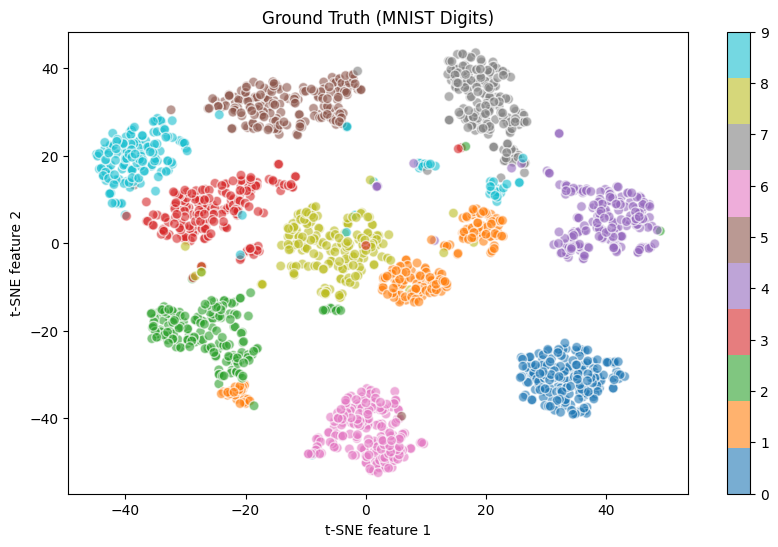

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


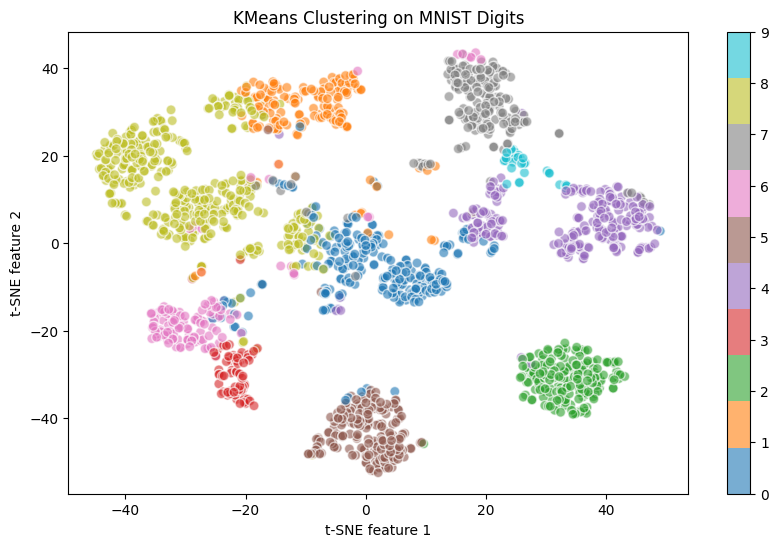

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the MNIST digit data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization function
def visualize_clusters(X_2D, labels, title=""):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6, edgecolors='w')
    plt.title(title)
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.colorbar(scatter)
    plt.show()

# Visualize ground truth
visualize_clusters(X_tsne, y, title="Ground Truth (MNIST Digits)")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize KMeans clustering results
visualize_clusters(X_tsne, kmeans_labels, title="KMeans Clustering on MNIST Digits")

